In [1]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.2 MB 6.0 MB/s eta 0:00:03
   ----- ---------------------------------- 2.4/16.2 MB 6.0 MB/s eta 0:00:03
   --------- ------------------------------ 3.7/16.2 MB 6.2 MB/s eta 0:00:03
   ------------ --------------------------- 5.0/16.2 MB 6.2 MB/s eta 0:00:02
   -------------- ------------------------- 6.0/16.2 MB 5.9 MB/s eta 0:00:02
   ------------------ --------------------- 7.3/16.2 MB 5.9 MB/s eta 0:00:02
   --------------------- ------------------ 8.7/16.2 MB 5.9 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.2 MB 6.0 MB/s eta 0:00:02
   --------------------------- ------------ 11.3/16.2 MB 6.0 MB/s eta 0:00:01
   ------------------------------- -------- 12.6/16.2 MB 6.0 MB/s eta 0:00:01
   ---------------------------------- ----- 13.9/16.2 MB 6.0 MB/s eta 0:00:01
 


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

shapefile_path = 'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

data = pd.read_csv("eu.csv")
world_merged = pd.merge(world, data, on="NAME")

In [3]:
world_merged["color"] = world_merged["EU"].map({"eurozone": "gold", "other eu members": "blue", "other countries": "grey"})

(34.0, 71.0)

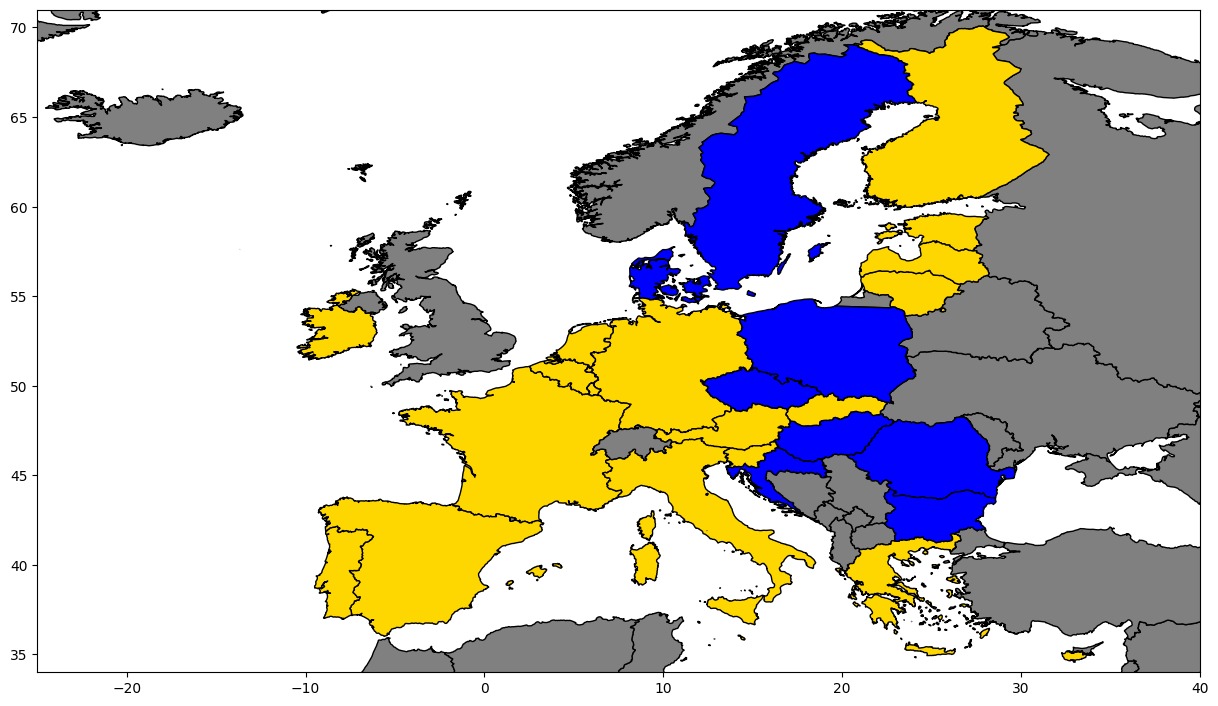

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_merged.plot(ax=ax, color=world_merged["color"], edgecolor='black')

ax.set_xlim([-25, 40])
ax.set_ylim([34, 71])

In [6]:
freedom = pd.read_csv("economic_freedom_index.csv")
world_merged = pd.merge(world, freedom, left_on="NAME", right_on="Country")

In [7]:
cmap = plt.cm.RdYlGn


In [8]:
color = cmap(world_merged["Overall Score"] / 100)

(-60.0, 30.0)

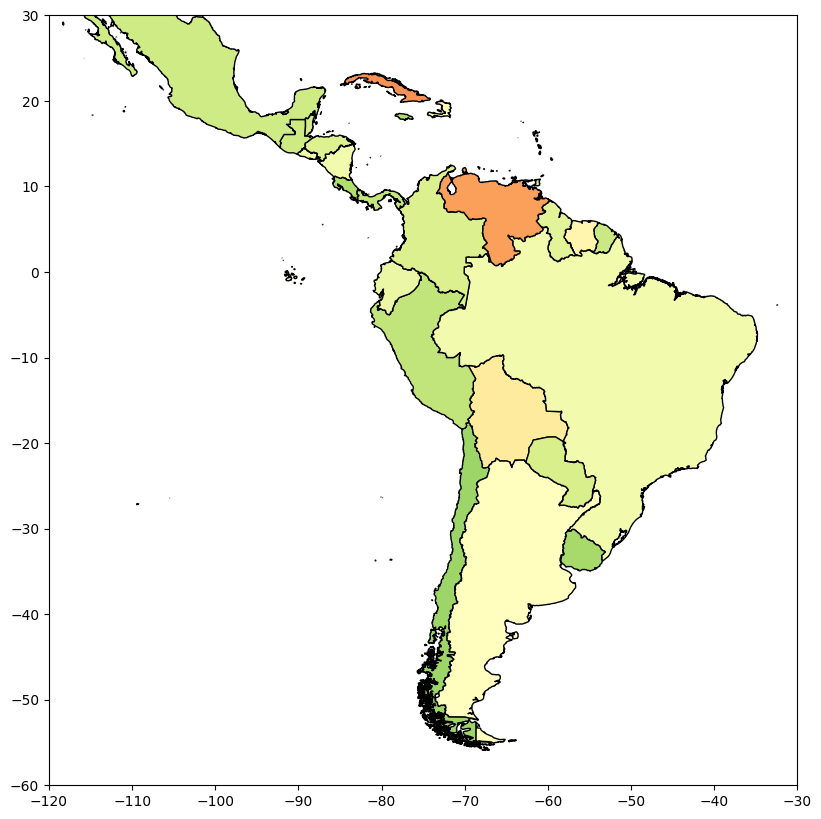

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_merged.plot(ax=ax, color=color, edgecolor='black')
ax.set_xlim([-120, -30])
ax.set_ylim([-60, 30])

In [10]:
import matplotlib as mpl

sm = mpl.cm.ScalarMappable(cmap=cmap)

In [11]:
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025)
cbar.set_label('Overall Score')
cbar.set_ticklabels(range(0, 101, 20))

C:\Users\nobic\AppData\Local\Temp\ipykernel_20168\2320465627.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(range(0, 101, 20))
